# HacX Transfer Learning Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image

In [26]:
train_directory = '../HacX/train/'
test_directory = '../HacX/test/'

# Initialise ImageDataGenerator and scale pixel values to range of 0 and 1.
# Conduct data augmentation through rotation, shift, shearing, zooming, flipping.
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=20,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                           fill_mode='nearest')

validation_image_generator = ImageDataGenerator(rescale=1./255)  # Data Augmentation is not applied for test dataset.

# Resize to 96X96 pixels, group into batches of 32.
train_generator = train_image_generator.flow_from_directory(
        train_directory,
        target_size=(96, 96),
        batch_size=32,
        shuffle=True,
        class_mode='categorical')

validation_generator = validation_image_generator.flow_from_directory(
        test_directory,
        target_size=(96, 96),
        batch_size=32,
        shuffle=False,
        class_mode='categorical')

Found 3734 images belonging to 3 classes.
Found 1244 images belonging to 3 classes.


In [27]:
print(train_generator.filenames)
print(train_generator.image_shape)
print(train_generator.classes)

print(validation_generator.filenames)
print(validation_generator.image_shape)
print(validation_generator.classes)

['haze\\haze_10.tif', 'haze\\haze_1000.tif', 'haze\\haze_1002.tif', 'haze\\haze_103.tif', 'haze\\haze_105.tif', 'haze\\haze_106.tif', 'haze\\haze_109.tif', 'haze\\haze_111.tif', 'haze\\haze_113.tif', 'haze\\haze_114.tif', 'haze\\haze_115.tif', 'haze\\haze_116.tif', 'haze\\haze_117.tif', 'haze\\haze_118.tif', 'haze\\haze_120.tif', 'haze\\haze_121.tif', 'haze\\haze_123.tif', 'haze\\haze_124.tif', 'haze\\haze_125.tif', 'haze\\haze_127.tif', 'haze\\haze_128.tif', 'haze\\haze_129.tif', 'haze\\haze_13.tif', 'haze\\haze_130.tif', 'haze\\haze_131.tif', 'haze\\haze_134.tif', 'haze\\haze_135.tif', 'haze\\haze_139.tif', 'haze\\haze_141.tif', 'haze\\haze_142.tif', 'haze\\haze_145.tif', 'haze\\haze_149.tif', 'haze\\haze_15.tif', 'haze\\haze_151.tif', 'haze\\haze_152.tif', 'haze\\haze_153.tif', 'haze\\haze_154.tif', 'haze\\haze_155.tif', 'haze\\haze_156.tif', 'haze\\haze_16.tif', 'haze\\haze_160.tif', 'haze\\haze_161.tif', 'haze\\haze_162.tif', 'haze\\haze_163.tif', 'haze\\haze_164.tif', 'haze\\haze

## Build Model

In [28]:
from keras.applications.inception_v3 import InceptionV3

# Load base model.
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(96, 96, 3)) 

# Redefine classification layers.
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='swish')(x)
x = Dropout(0.2)(x)
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=prediction)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_188 (Conv2D) │ (None, 47, 47,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 47, 47,    │         96 │ conv2d_188[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_188      │ (None, 47, 47,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_189 (Conv2D) │ (None, 45, 45,    │      9,216 │ activation_188[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 45, 45,    │         96 │ conv2d_189[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_189      │ (None, 45, 45,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_190 (Conv2D) │ (None, 45, 45,    │     18,432 │ activation_189[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 45, 45,    │        192 │ conv2d_190[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_190      │ (None, 45, 45,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 22, 22,    │          0 │ activation_190[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_191 (Conv2D) │ (None, 22, 22,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 22, 22,    │        240 │ conv2d_191[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_191      │ (None, 22, 22,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_192 (Conv2D) │ (None, 20, 20,    │    138,240 │ activation_191[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 20,    │        576 │ conv2d_192[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_192      │ (None, 20, 20,    │          0 │ batch_normalizat

 Total params: 22,853,411 (87.18 MB)

 Trainable params: 22,818,979 (87.05 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [29]:
# Unfreeze base model to fine tune weights.
base_model.trainable = True

for layer in model.layers[:100]:
    layer.trainable = False

for layer in model.layers[100:]:
    layer.trainable = True

In [30]:
from tensorflow.keras.optimizers.schedules import CosineDecayRestarts
from tensorflow.keras.optimizers import Adam

lr_scheduler = CosineDecayRestarts(
    initial_learning_rate=0.0001,
    first_decay_steps=1000,
    t_mul=2.0,
    m_mul=1.0,
    alpha=0.0,
)

optimizer = Adam(learning_rate=lr_scheduler)

model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(train_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 70s 418ms/step - accuracy: 0.6853 - loss: 0.7803 - val_accuracy: 0.7500 - val_loss: 0.6540
Epoch 2/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 48s 406ms/step - accuracy: 0.7598 - loss: 0.5924 - val_accuracy: 0.8127 - val_loss: 0.5151
Epoch 3/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 51s 433ms/step - accuracy: 0.8182 - loss: 0.4769 - val_accuracy: 0.8585 - val_loss: 0.3960
Epoch 4/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 48s 413ms/step - accuracy: 0.8503 - loss: 0.4034 - val_accuracy: 0.8786 - val_loss: 0.3482
Epoch 5/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 49s 416ms/step - accuracy: 0.8661 - loss: 0.3595 - val_accuracy: 0.8891 - val_loss: 0.3141
Epoch 6/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 49s 416ms/step - accuracy: 0.8677 - loss: 0.3467 - val_accuracy: 0.8923 - val_loss: 0.2988
Epoch 7/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 48s 408ms/step - accuracy: 0.8776 - loss: 0.3258 - val_accuracy: 0.8995 - val_loss: 0.2888
Epoch 8/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 48s 412ms/step - accuracy: 0.8779 - loss: 0

In [38]:
model.save('../models/inceptionv3.h5')

## Evaluate Model

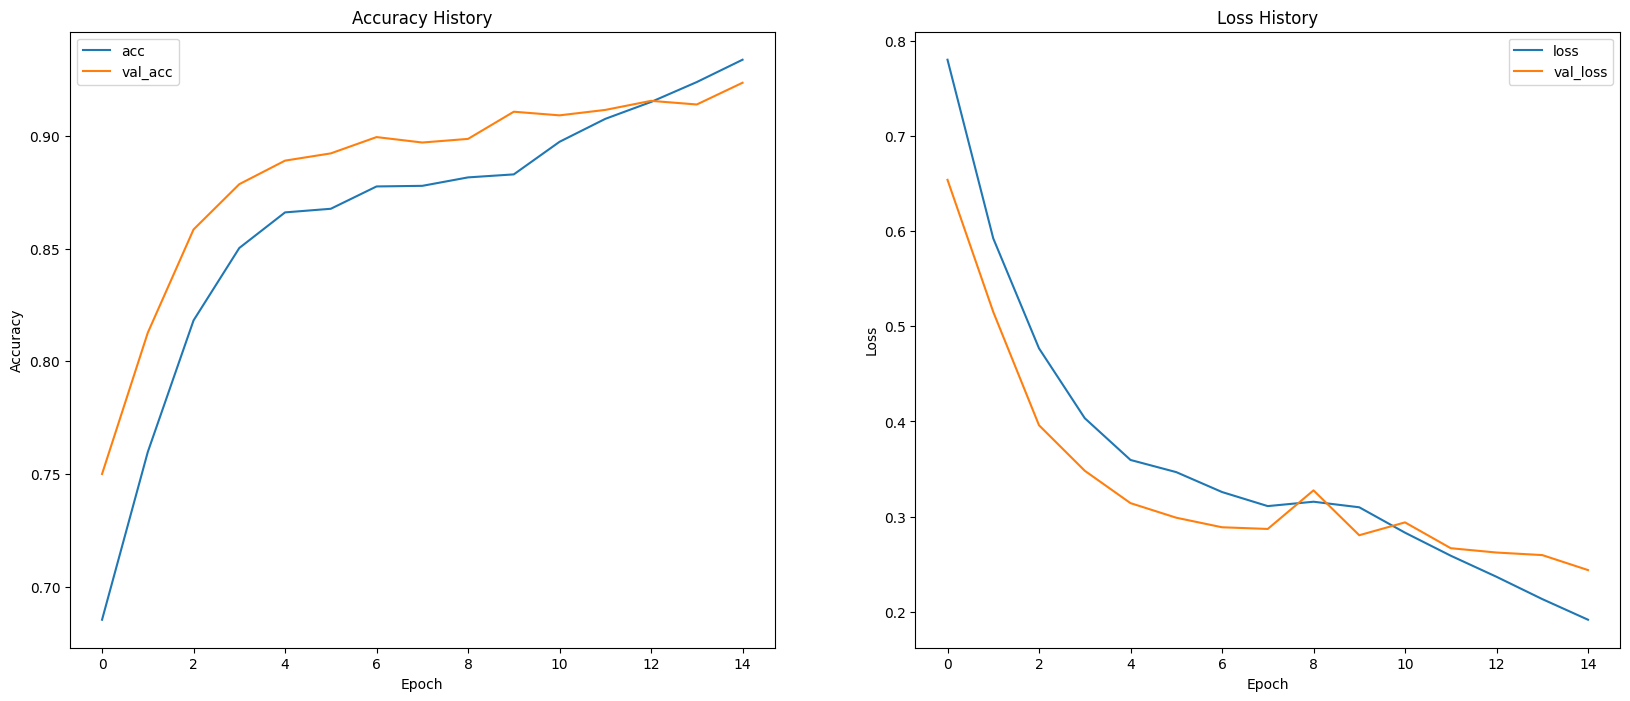

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(len(loss))

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step


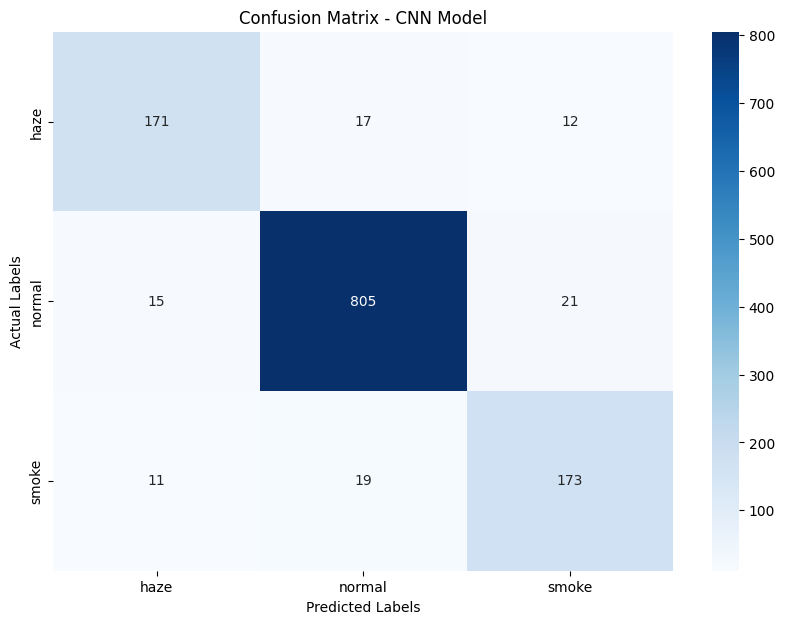

In [32]:
# Get true labels.
y_true = validation_generator.classes

# Get class labels.
class_labels = list(validation_generator.class_indices.keys())

# Make predictions.
y_pred_probs = model.predict(validation_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Plot confusion matrix.
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - CNN Model')
plt.show()

## Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: normal


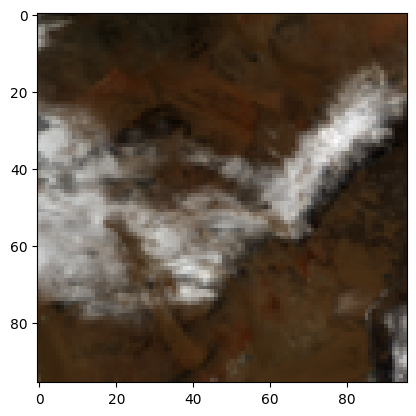

In [ ]:
img = Image.open((test_directory + 'normal'+'/'+ "cloud_4.tif")).resize((96,96))
img = np.array(img)/255.0

result = model.predict(img[np.newaxis, ...])
predicted_class = np.argmax(result[0], axis=-1)

plt.imshow(img)

classes = ['haze', 'normal', 'smoke']
print("Prediction:", classes[predicted_class])